So wie es im Allgemeinen viele einfache Regeln für guten Code gibt, gibt es mehrere Aspekte, die die Qualität eines Quantenprogramms definieren, z.B. Anzahl der Quantenbits, Tiefe, Laufzeit, Anzahl der Anweisungen etc.

In diesem Praktikum verwenden das Maß "Anzahl der Anweisungen" oder "Quantenkosten", um unser Programm zu bewerten:

Quantenkosten = Single-Qubit-Gates + CX-Gates*10

Jede gegebene Quantenschaltung kann in Einzel-Qubit-Gatter (ein Befehl, der einem einzelnen Qubit gegeben wird) und Zwei-Qubit-Gatter zerlegt werden. Mit den aktuellen NISQ-Geräten (Noisy Intermediate-Scale Quantum) wird bei der Implementierung von CX-Gattern stärkeres Rauschen verursacht. Daher werden wir CX-Gates zur Kostenbewertung zehnmal stärker gewichtet als ein Single-Qubit-Gate.

Sie können die Gate-Kosten selbst mit einem Programm namens "Unroller" berechnen. Ein Beispiel:


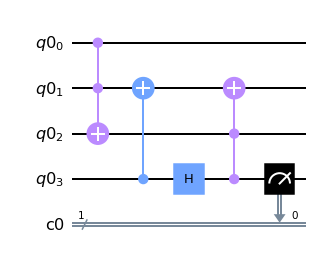

In [1]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer, execute
from qiskit.quantum_info import Pauli, state_fidelity, process_fidelity
q = QuantumRegister(4, 'q0')
c = ClassicalRegister(1, 'c0')
qc = QuantumCircuit(q, c)
qc.ccx(q[0], q[1], q[2])
qc.cx(q[3], q[1])
qc.h(q[3])
qc.ccx(q[3], q[2], q[1])
qc.measure(q[3],c[0])
qc.draw(output='mpl')

In [2]:
qc.count_ops()

OrderedDict([('ccx', 2), ('cx', 1), ('h', 1), ('measure', 1)])

Wie Sie sehen können, enthält diese Quantenschaltung ein Hadamard-Gatter, ein CX-Gatter und Toffoli-Gatter. Durch die Verwendung von qiskit.transpiler und den Import von PassManager können wir diese Schaltung wie unten gezeigt in vom Unroller angegebene Gates zerlegen, in diesem Fall in u3-Gates und cx-Gates.

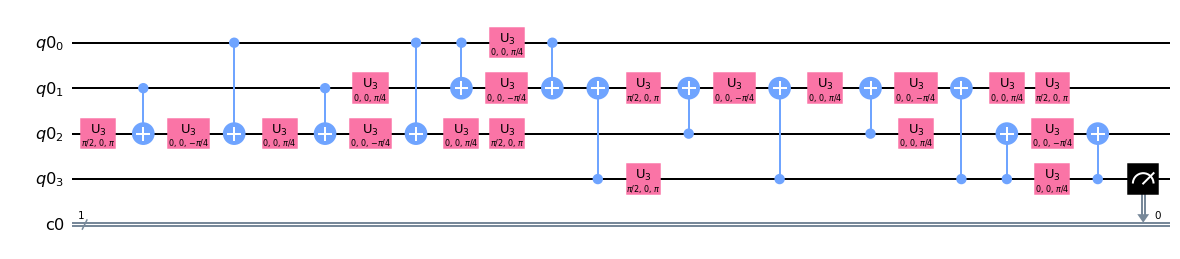

In [3]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc) 
new_circuit.draw(output='mpl')

In [4]:
new_circuit.count_ops()

OrderedDict([('u3', 19), ('cx', 13), ('measure', 1)])

Die Kosten für diesen Schaltkreis sind also 19+13*10=149.


Beispiel 2: Toffoli-Gatter

Sie können leicht überprüfen, wie andere Gates als Single-Qubit-Gates und CX-Gates vom Unroller zerlegt werden können. Wenn Sie also daran interessiert sind, wie ein bestimmtes Zwei-Qubit-Gatter oder Drei-Qubit-Gatter zerlegt werden kann, testen Sie am Besten ein paar verschiedene. Im folgenden Beispiel haben wir den Unroller verwendet, um ein CCX-Gate in u3-Gates und CX-Gates zu zerlegen.

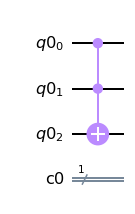

In [5]:
q = QuantumRegister(3, 'q0')
c = ClassicalRegister(1, 'c0')
qc = QuantumCircuit(q, c)
qc.ccx(q[0], q[1], q[2])
qc.draw(output='mpl')

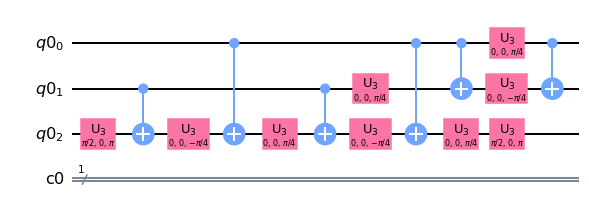

In [6]:
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc) 
new_circuit.draw(output='mpl')

In [7]:
new_circuit.count_ops()

OrderedDict([('u3', 9), ('cx', 6)])

Die Gesamtkosten für ein Toffoli-Gate betragen also 9+6*10=69.

Mit dem Unroller können Sie jede Schaltung, die mit beliebigen Gates aufgebaut ist, in Single-Qubit-U3-Gates und CX-Gates zerlegen.